## Reading and ploating audio data

(132300,)
int16
3


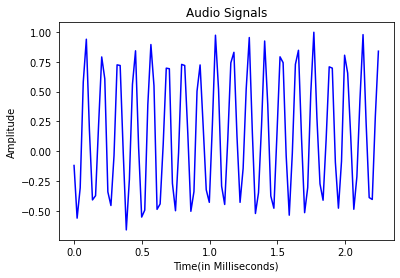

In [22]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile

sampling_freq,audio = wavfile.read('Chapter07_input_read.wav')
print(audio.shape)
print(audio.dtype)
print(round(audio.shape[0]/float(sampling_freq)))

audio = audio/(2.**15)
audio = audio[:100]

xvalues = np.arange(0,len(audio),1)/float(sampling_freq)
xvalues *=1000

plt.plot(xvalues,audio,color='blue')
plt.xlabel('Time(in Milliseconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signals')
plt.show()


## Synthesizing Music

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io.wavfile import write
import json


file = 'tone_freq_map.json'
with open(file,'r') as f:
    tfm = json.loads(f.read())

inputtone = 'Csharp'
duration = 2
amplitude = 10000
sampling_freq = 44100

def synthesizer(frequency,duration,amplitude=1.0,sampling_freq=44100):
    t =np.linspace(0,duration,duration*sampling_freq)
    audio = amplitude * np.sin(2*np.pi*frequency*t)
    return audio.astype(np.int16)

stone = synthesizer(440,duration,amplitude,sampling_freq)
write('output.wav',sampling_freq,stone)



In [10]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io.wavfile import write
import json


file = 'tone_freq_map.json'
with open(file,'r') as f:
    tfm = json.loads(f.read())

inputtone = 'Csharp'
duration = 2
amplitude = 10000
sampling_freq = 44100

def synthesizer(frequency,duration,amplitude=1.0,sampling_freq=44100):
    t =np.linspace(0,duration,duration*sampling_freq)
    audio = amplitude * np.sin(2*np.pi*frequency*t)
    return audio.astype(np.int16)

# stone = synthesizer(440,duration,amplitude,sampling_freq)
# write('output.wav',sampling_freq,stone)


for i in tfm.keys():
    stone = synthesizer(tfm[i],duration,amplitude,sampling_freq)
    fname = i+'.wav'
    print(stone,stone.size)
    write(fname,sampling_freq,stone)

[    0   626  1250 ... -1250  -626     0] 88200
[    0   663  1323 ... -1323  -663     0] 88200
[    0   703  1403 ... -1403  -703     0] 88200
[    0   744  1484 ... -1484  -744     0] 88200
[    0   788  1572 ... -1572  -788     0] 88200
[    0   835  1664 ... -1664  -835     0] 88200
[    0   885  1763 ... -1763  -885     0] 88200
[    0   937  1866 ... -1866  -937     0] 88200
[    0   992  1975 ... -1975  -992     0] 88200
[    0  1052  2093 ... -2093 -1052     0] 88200
[    0  1114  2215 ... -2215 -1114     0] 88200
[    0  1181  2345 ... -2345 -1181     0] 88200


In [21]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io.wavfile import write
import json


file = 'tone_freq_map.json'
with open(file,'r') as f:
    tfm = json.loads(f.read())

inputtone = 'Csharp'
duration = 2
amplitude = 10000
sampling_freq = 44100

def synthesizer(frequency,duration,amplitude=1.0,sampling_freq=44100):
    t =np.linspace(0,duration,duration*sampling_freq)
    audio = amplitude * np.sin(2*np.pi*frequency*t)
    return audio.astype(np.int16)

# stone = synthesizer(440,duration,amplitude,sampling_freq)
# write('output.wav',sampling_freq,stone)

output = np.array([],dtype="int16")

for i in tfm.keys():
    stone = synthesizer(tfm[i],duration,amplitude,sampling_freq)
    output = np.append(output,stone)
write('test.wav',sampling_freq,output)